### Vecrotizing language

In [ ]:
# Load the large model to get the vectors
nlp = spacy.load('en_core_web_lg')

review_data = pd.read_csv('../input/nlp-course/yelp_ratings.csv')
review_data.head()

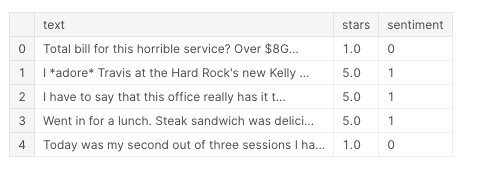

In [ ]:
reviews = review_data[:100]
# We just want the vectors so we can turn off other models in the pipeline
with nlp.disable_pipes():
    vectors = np.array([nlp(review.text).vector for idx, review in reviews.iterrows()])
    
# Loading all document vectors from file
vectors = np.load('../input/nlp-course/review_vectors.npy')

### Training a Model on Document Vectors

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, review_data.sentiment, 
                                                    test_size=0.1, random_state=1)

# Create the LinearSVC model
model = LinearSVC(random_state=1, dual=False)
# Fit the model
model.fit(X_train, y_train)

### Centering the Vectors and finding the most similar review

In [ ]:
review = """I absolutely love this place. The 360 degree glass windows with the 
Yerba buena garden view, tea pots all around and the smell of fresh tea everywhere 
transports you to what feels like a different zen zone within the city. I know 
the price is slightly more compared to the normal American size, however the food 
is very wholesome, the tea selection is incredible and I know service can be hit 
or miss often but it was on point during our most recent visit. Definitely recommend!

I would especially recommend the butternut squash gyoza."""

def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

review_vec = nlp(review).vector

## Center the document vectors
# Calculate the mean for the document vectors, should have shape (300,)
vec_mean = vectors.mean(axis=0)
# Subtract the mean from the vectors
centered = vectors - vec_mean

# Calculate similarities for each document in the dataset
# Make sure to subtract the mean from the review vector
sims = np.array([cosine_similarity(review_vec - vec_mean, vec) for vec in centered])

# Get the index for the most similar document
most_similar =  sims.argmax()